Adam Peetz<br>
MSDS 686 Deep Learning<br>
Professor Nasheb Ismaily<br>
Regis Jesuit University<br>
May 15th 2022
# Fuel Efficiency Assignment
## Adapted from TensorFlow Tutorials
#### Using the Boston Housing jupyter notebook as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend
tf.random.set_seed(1234)

In [3]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# Vehicle orgin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [6]:
# Remove missing data
cleandf = dataset.dropna(axis=0)
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   USA           392 non-null    float64
 8   Europe        392 non-null    float64
 9   Japan         392 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.7 KB


In [7]:
# Split dataset into X and y tragets and remove the targets from the dataset.  We are predicting MPG (fuel efficiencey) so the targets are MPG
X = cleandf.drop(['MPG'],axis=1)
y = cleandf['MPG']

In [8]:
# Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = X.mean(axis = 0)
X -= mean

std = X.std(axis = 0)
X /= std

In [9]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle= True)

In [10]:
# Built a sequential neural network model.  Start with backend.clear_session()
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (X.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='linear'))

### Building an input layer.

The number of neurons in the input layer should be equal to the number of features in the dataset.

### Building an output layer.
<b>Neuron Count</b>
<br>
The number of neurons in the output layer should be equal to the number of variables in the output.
<br>
For a categorization task this is equal to the number of labels. 
<br>
For a regression task this is equal to 1.
<br>
<br>
<b>Activation Function</b>
<br>
SoftMax activations are used for classification problems where only one class needs to be chosen.
<br>
Sigmoid activations are used for multilabel problems, in which more than one class can be chosen.
<br>
Linear activations are appropriate for regression problems. <br>
<br>

Brownlee, Jason.(2021).choose an activation function for deep learning. MachineLearning Mastery.com.https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

In [11]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mae', metrics=['mae'])

### Choosing a loss function

Regression Loss Functions</br>
- Mean Squared Error Loss
- Mean Squared Logarithmic Error Loss
- Mean Absolute Error Loss

Binary Classification Loss Functions </br>
- Binary Cross-Entropy
- Hinge Loss
- Squared Hinge Loss

Multiple Class Loss Functions </br>
- Multi-Class Cross-Entropy Loss
- Sparse Multiclass Cross-Entropy Loss
- Kullback Leibler Divergence Loss

### Choosing metrics

Accuracy is an acceptable metric for a binary classification function.<br>

Both accuracy and categorical_accuracy are appropriate metrics for a multiclass classification problem.<br>

MAE and MSE are acceptable loss and metrics functions for a regression problem.


In [12]:
history = model.fit(x_train,
                   y_train,
                   epochs = 1000,
                   batch_size=100,
                   validation_split = 0.2,
                   verbose = 0)

In [13]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist)

          loss        mae   val_loss    val_mae
0    23.264294  23.264294  23.630926  23.630926
1    22.968315  22.968315  23.351854  23.351854
2    22.659649  22.659649  23.061825  23.061825
3    22.342789  22.342789  22.757631  22.757631
4    22.013729  22.013729  22.440706  22.440706
..         ...        ...        ...        ...
995   1.181588   1.181588   1.819747   1.819747
996   1.170741   1.170741   1.871426   1.871426
997   1.162092   1.162092   1.843948   1.843948
998   1.175562   1.175562   1.826289   1.826289
999   1.160460   1.160460   1.831838   1.831838

[1000 rows x 4 columns]


In [14]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

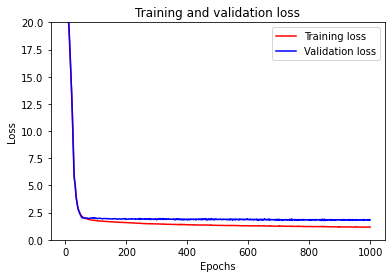

In [15]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

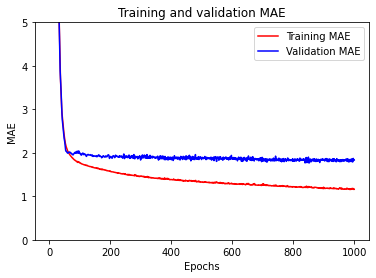

In [16]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 1ms/step - loss: 2.1318 - mae: 2.1318
[2.131824016571045, 2.131824016571045]
['loss', 'mae']


# Model Discussion

The sequential model had a mean average error of about 2 when tested on the test dataset. For any MPG that was predicted, it was on average 2 MPG off the actual MPG.<br>
<br>
The validation loss and MAE stopped improving around 50 epochs. The model should be trained for around 50 epochs and stopped to prevent it from becoming overfitted to the training data.<br>
<br>
Fuel efficiency has a high correlation to certain variables in the dataset. Features like the weight of a vehicle and its engine displacement are more impactful than its production year or country of origin. A model should be able to successfully predict fuel efficiency with only a few neurons trained to ignore the features that do not have high correlation to the target variable. Given enough epochs, it should be able to reduce the effect the weights of non-correlated features and converge on an optimal solution. <br>
<br>
To test this assumption, a new network architecture has been created that contains 5 neurons in a single hidden layer. The number of epochs in the test is increased to 2,000 to give the model time to train down the non-effective feature weights. The reduced model performs similarly in training and test, achieving a MAE score of around 2 MPG on both training and test data. This model is slower to train than the deeper model. It needs around 700 epochs to settle on a solution compared to about 100 needed by the original model.


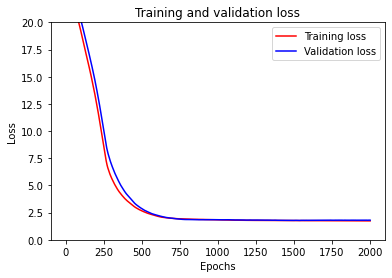

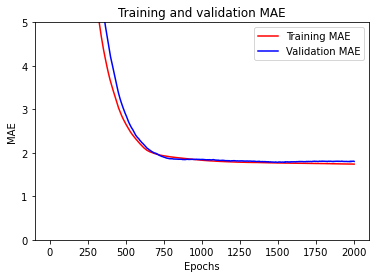

3/3 [==============================] - 0s 2ms/step - loss: 2.1467 - mae: 2.1467
[2.1467339992523193, 2.1467339992523193]
['loss', 'mae']


In [25]:
# Clear your session using this command: backend.clear_session() 
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(5, activation = 'relu', input_shape = (X.shape[1],)))
model.add(layers.Dense(1, activation='linear'))

# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mae', metrics=['mae'])

history = model.fit(x_train,
                   y_train,
                   epochs = 2000,
                   batch_size=100,
                   validation_split = 0.2,
                   verbose = 0)

#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.ylim(0,20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.title('Training and validation MAE')
plt.ylim(0,5)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

In [26]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist)

           loss        mae   val_loss    val_mae
0     22.807583  22.807583  23.438656  23.438656
1     22.782991  22.782991  23.415905  23.415905
2     22.758018  22.758018  23.393160  23.393160
3     22.733334  22.733334  23.370338  23.370338
4     22.708691  22.708691  23.347570  23.347570
...         ...        ...        ...        ...
1995   1.741089   1.741089   1.807359   1.807359
1996   1.740688   1.740688   1.806443   1.806443
1997   1.740363   1.740363   1.806832   1.806832
1998   1.741516   1.741516   1.806149   1.806149
1999   1.740135   1.740135   1.802653   1.802653

[2000 rows x 4 columns]
